In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('Downloads/restaurant-revenue-prediction/train.csv')
data_test = pd.read_csv('Downloads/restaurant-revenue-prediction/test.csv')

In [3]:
data_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [4]:
data_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [5]:
data_test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [6]:
data_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [7]:
print("Train Dataset Shape:{0},\n Test Dataset Shape :{1}".format(data_train.shape,data_test.shape))

Train Dataset Shape:(137, 43),
 Test Dataset Shape :(100000, 42)


In [8]:
data_train.drop('Id', axis = 1, inplace = True)
data_test.drop('Id', axis = 1, inplace = True)

In [9]:
data_train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [10]:
data_test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Open Date   100000 non-null  object 
 1   City        100000 non-null  object 
 2   City Group  100000 non-null  object 
 3   Type        100000 non-null  object 
 4   P1          100000 non-null  int64  
 5   P2          100000 non-null  float64
 6   P3          100000 non-null  float64
 7   P4          100000 non-null  float64
 8   P5          100000 non-null  int64  
 9   P6          100000 non-null  int64  
 10  P7          100000 non-null  int64  
 11  P8          100000 non-null  int64  
 12  P9          100000 non-null  int64  
 13  P10         100000 non-null  int64  
 14  P11         100000 non-null  int64  
 15  P12         100000 non-null  int64  
 16  P13         100000 non-null  float64
 17  P14         100000 non-null  int64  
 18  P15         100000 non-null  int64  
 19  P16

In [13]:
data_train.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [14]:
data_test.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [15]:
data_train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [16]:
data_test.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


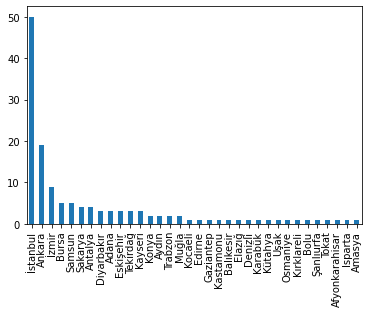

In [17]:
data_train["City"].value_counts().plot(kind='bar')
plt.show()

In [18]:
data_train["Open Date"] = pd.to_datetime(data_train["Open Date"])
data_train["Year"] = data_train["Open Date"].apply(lambda x:x.year)
data_train["Month"] = data_train["Open Date"].apply(lambda x:x.month)
data_train["Day"] = data_train["Open Date"].apply(lambda x:x.day)

In [19]:
data_test["Open Date"] = pd.to_datetime(data_test["Open Date"])
data_test["Year"] = data_test["Open Date"].apply(lambda x:x.year)
data_test["Month"] = data_test["Open Date"].apply(lambda x:x.month)
data_test["Day"] = data_test["Open Date"].apply(lambda x:x.day)

In [20]:
data_train

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Day
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,2009,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,5787594.0,2008,6,25
133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,9262754.0,2006,10,12
134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2544857.0,2006,7,8
135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,7217634.0,2010,10,29


In [21]:
data_test

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,Year,Month,Day
0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,2011,1,22
1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,2011,3,18
2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,2013,10,30
3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,4,0,0,0,0,0,0,2013,5,6
4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,2013,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000-01-05,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,2000,1,5
99996,2011-07-18,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,0,0,0,4,0,0,0,2011,7,18
99997,2012-12-29,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,5,3,2,4,4,4,2,2012,12,29
99998,2013-10-12,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,0,0,4,0,0,0,0,2013,10,12


In [22]:
data_train.drop('Open Date',axis=1,inplace=True)
data_train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Day
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3,2,3,4,3,3,4316715.0,2009,5,9


In [23]:
data_test.drop('Open Date',axis=1,inplace=True)
data_test.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,Year,Month,Day
0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,2011,1,22
1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,2011,3,18
2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,2013,10,30
3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,...,4,0,0,0,0,0,0,2013,5,6
4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,2013,7,31


In [24]:
data_train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [25]:
data_train['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

<AxesSubplot:xlabel='City Group', ylabel='count'>

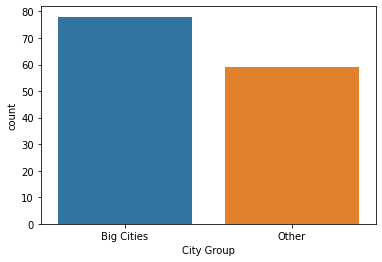

In [26]:
sns.countplot(x='City Group',data=data_train)

<AxesSubplot:xlabel='City Group', ylabel='count'>

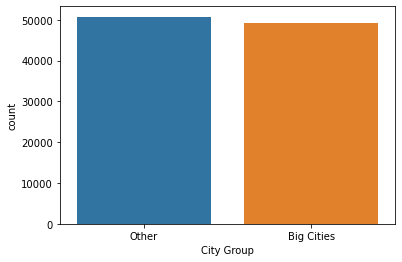

In [27]:
sns.countplot(x='City Group',data=data_test)

In [28]:
data_train['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

<AxesSubplot:xlabel='Type', ylabel='count'>

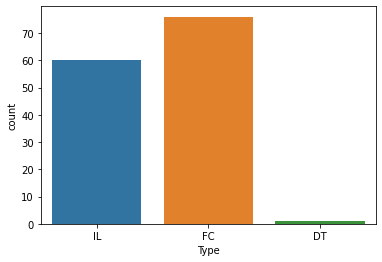

In [29]:
sns.countplot(x='Type',data=data_train)

<AxesSubplot:xlabel='Type', ylabel='count'>

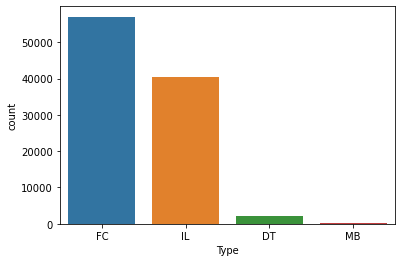

In [30]:
sns.countplot(x='Type',data=data_test)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
data_train["City Group"] = le.fit_transform(data_train["City Group"])
data_train["Type"] = le.fit_transform(data_train["Type"])
data_train["City"] = le.fit_transform(data_train["City"])

In [33]:
le = LabelEncoder()
data_test["City Group"] = le.fit_transform(data_test["City Group"])
data_test["Type"] = le.fit_transform(data_test["Type"])
data_test["City"] = le.fit_transform(data_test["City"])

In [34]:
data_train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Day
0,31,0,2,4,5.0,4.0,4.0,2,2,5,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,3,0,1,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,10,1,2,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,28,1,2,6,4.5,6.0,6.0,4,4,10,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,14,1,2,3,4.0,3.0,4.0,2,2,5,...,3,2,3,4,3,3,4316715.0,2009,5,9


In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        137 non-null    int32  
 1   City Group  137 non-null    int32  
 2   Type        137 non-null    int32  
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

In [36]:
data_train.isnull().sum()

City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
Year          0
Month         0
Day           0
dtype: int64

In [37]:
data_test.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,Year,Month,Day
0,38,1,1,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,2011,1,22
1,27,1,2,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,2011,3,18
2,3,0,1,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,2013,10,30
3,26,1,2,2,4.0,4.0,4.0,2,3,5,...,4,0,0,0,0,0,0,2013,5,6
4,1,1,1,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,2013,7,31


<AxesSubplot:>

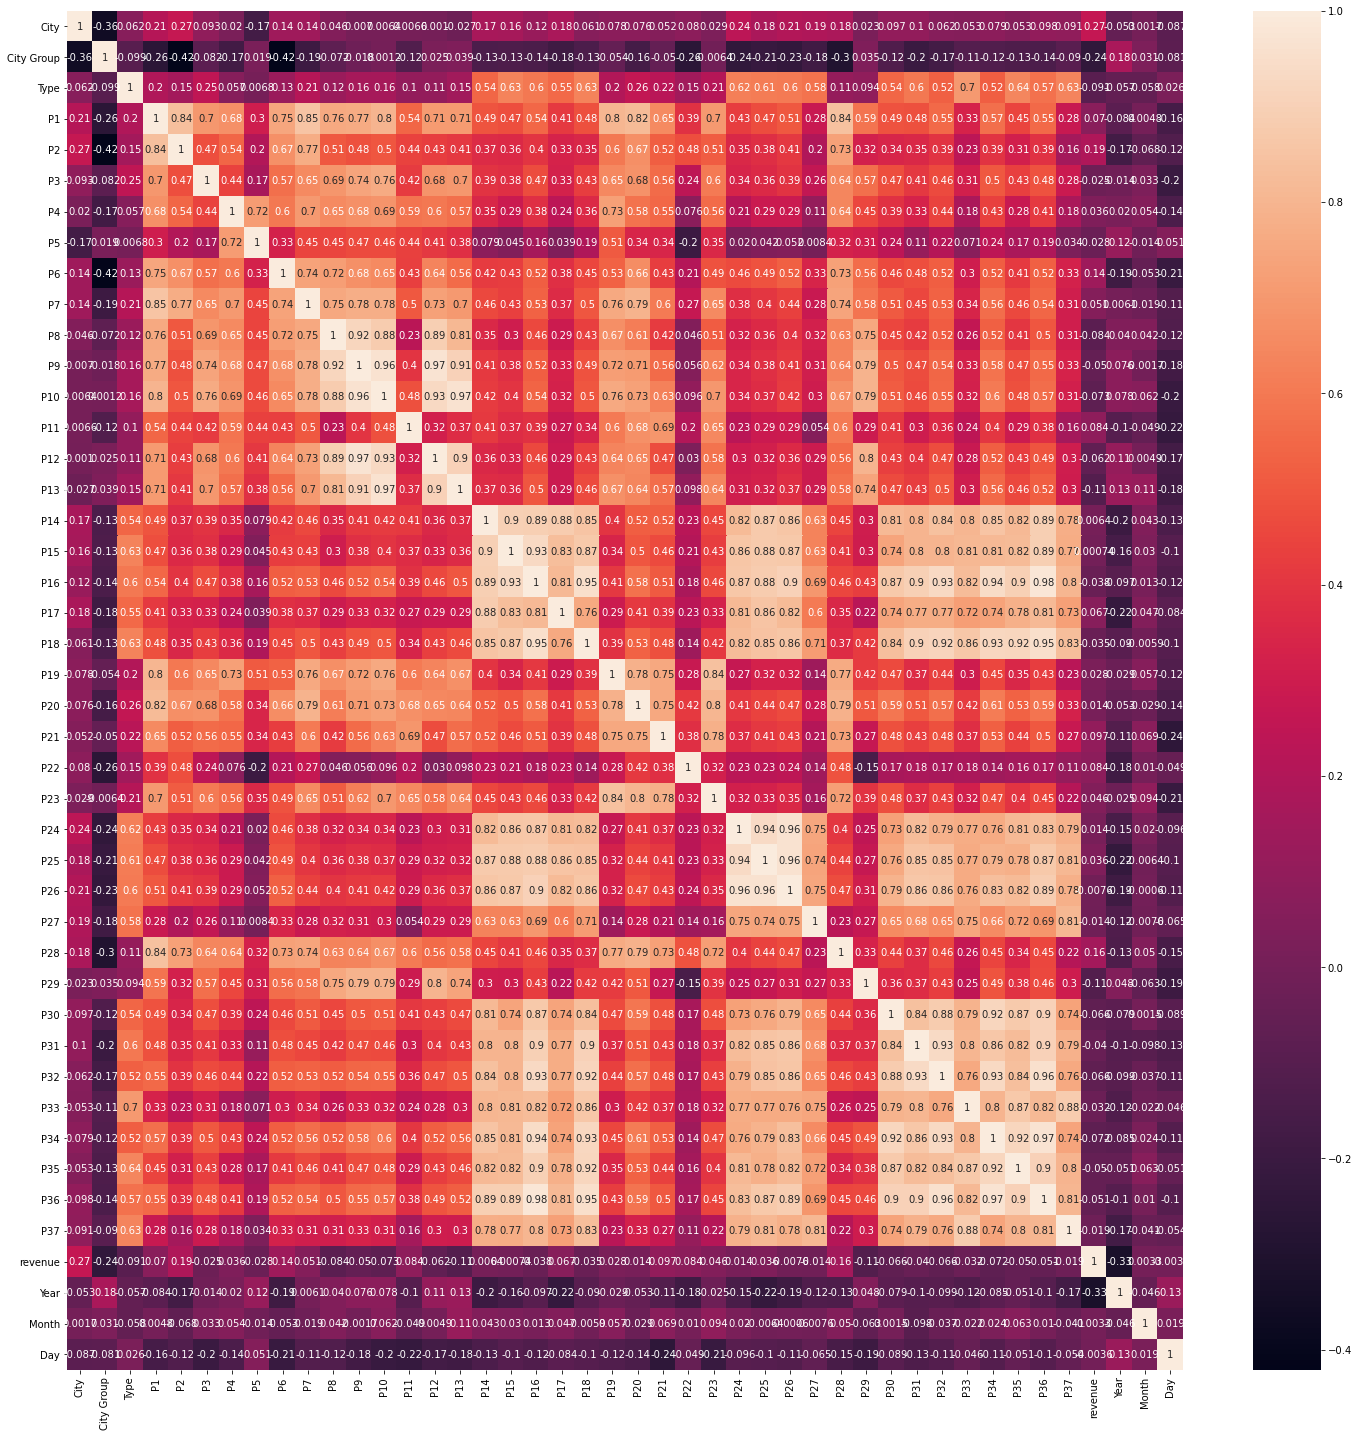

In [38]:
plt.figure(figsize=(25,25))
sns.heatmap(data_train.corr(),annot=True)

In [39]:
X_train = data_train.drop('revenue',axis=1)

In [40]:
y_train = data_train['revenue']

In [41]:
X_test = data_test

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [43]:
# split using train_test_split from model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,random_state = 0)

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([ 4667190.605326  ,  5384090.58969903,  2468623.25712711,
       -1281062.34601581,  3293411.89346284,  5819072.35246509,
         998889.34011674,  1997069.98484951, -3713415.5298695 ,
        3022780.11617684,  4457177.05524051,  4302961.01809978,
        5502645.08097768,  7901141.11692131,  5379663.11900735,
        -561808.95282161,  6497216.1185053 , 11525674.9735406 ,
       -6112647.56291914,  3368613.96846491,  -127588.82160711,
        4148621.14330238,  8080910.3062951 ,  4104957.12065667,
        3794046.53305578,  4894403.47685897,  4470983.26624042,
        5804624.25885957,  3513750.04264879, 10831353.9611603 ,
        2970351.90206528,  3158415.08732677,  1559875.15118152,
        4551006.01756084,  3815118.26148301])

In [48]:
y_test

26      2267425.0
8       4952497.0
86      3351383.0
78      3871344.0
43      2732645.0
85      7495092.0
22      3956086.0
50      2156098.0
45      3752885.0
24      8904084.0
59      3600467.0
113     2097022.0
54      4651866.0
27      5435276.0
62      5286212.0
115     4882985.0
114     4155435.0
122     4286645.0
104     4467728.0
84      4250553.0
60      3164972.0
18      5337526.0
92      6782425.0
33      2371202.0
94      3753720.0
48      7201784.0
7       4491607.0
16     19696939.0
128     2383840.0
10      3745135.0
2       2055379.0
51      3273041.0
101     4758476.0
116     8894598.0
30      3008199.0
Name: revenue, dtype: float64

In [49]:
model.intercept_

368386783.0668138

In [50]:
model.coef_

array([   60164.75397628,    92590.87674323,   249421.79892145,
         318176.41842727,  -227199.971472  ,  -374243.45860994,
          20159.79139303,  -411114.28662189,   432944.57835336,
          78371.66055715, -1092062.19655274,   521598.75210672,
         231477.13233066,    71675.31435998,   399586.45113811,
        -584788.54274649,    12141.69803635,  -157918.31636725,
        -161855.35036846,  -463025.5211525 ,    14455.95951285,
         -33655.73699023,  -778470.37673243,   800120.58345292,
         153150.5560894 ,    69308.95880142,  1268475.60455786,
        1700770.96469624, -2610111.77760194,  -218154.36310228,
         477286.17528133,    14448.09360553,   214898.35499765,
          67744.75684051,  -145563.94764826,  -191611.75221277,
         -63760.77673392,  -108984.44737302,   484977.94438903,
          11883.07683942,  -181612.09781552,    81650.42747306,
          58762.99277738])

In [51]:
coeff_df = pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
City,6.016475e+04
City Group,9.259088e+04
Type,2.494218e+05
P1,3.181764e+05
P2,-2.272000e+05
P3,-3.742435e+05
P4,2.015979e+04
P5,-4.111143e+05
P6,4.329446e+05
P7,7.837166e+04


In [52]:
y_pred = model.predict(X_test)

In [53]:
y_pred

array([ 4667190.605326  ,  5384090.58969903,  2468623.25712711,
       -1281062.34601581,  3293411.89346284,  5819072.35246509,
         998889.34011674,  1997069.98484951, -3713415.5298695 ,
        3022780.11617684,  4457177.05524051,  4302961.01809978,
        5502645.08097768,  7901141.11692131,  5379663.11900735,
        -561808.95282161,  6497216.1185053 , 11525674.9735406 ,
       -6112647.56291914,  3368613.96846491,  -127588.82160711,
        4148621.14330238,  8080910.3062951 ,  4104957.12065667,
        3794046.53305578,  4894403.47685897,  4470983.26624042,
        5804624.25885957,  3513750.04264879, 10831353.9611603 ,
        2970351.90206528,  3158415.08732677,  1559875.15118152,
        4551006.01756084,  3815118.26148301])

In [54]:
model.score(X_train,y_train)

0.5764483364014146

In [55]:
import statsmodels.api as sm

In [56]:
ols = sm.OLS(endog=y_train,exog=X_train).fit()

In [57]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                revenue   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              11.58
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    1.09e-16
Time:                        18:19:32   Log-Likelihood:                         -1602.2
No. Observations:                 102   AIC:                                      3290.
Df Residuals:                      59   BIC:                                      3403.
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
City        4.992e+04   2.64e+04      1.889      0.064   -2959.789    1.03e+05
City Group -7517.8077   7.11e+05     -0.011      0.992   -1.43e+06    1.41e+06
Type          1.8e+05   9.68e+05      0.186      0.853   -1.76e+06    2.12e+06
P1          1.558e+05   3.95e+05      0.394      0.695   -6.35e+05    9.46e+05
P2         -7.116e+04   3.91e+05     -0.182      0.856   -8.54e+05    7.12e+05
P3         -3.017e+05   4.73e+05     -0.638      0.526   -1.25e+06    6.45e+05
P4         -9790.1102    6.4e+05     -0.015      0.988   -1.29e+06    1.27e+06
P5         -4.011e+05   4.47e+05     -0.897      0.373    -1.3e+06    4.94e+05
P6          5.186e+05   2.75e+05      1.885      0.064    -3.2e+04    1.07e+06
P7         -3895.5368   2.76e+05     -0.014      0.989   -5.56e+05    5.48e+05
P8         -9.513e+05   6.28e+05     -1.516      0.135   -2.21e+06    3.05e+05
P9          2.149e+05   1.07e+06      0.200      0.842   -1.93e+06    2.36e+06
P10        -9.734e+04   1.88e+06     -0.052      0.959   -3.86e+06    3.67e+06
P11         8.574e+04   3.05e+05      0.281      0.780   -5.25e+05    6.97e+05
P12         5.398e+05   7.43e+05      0.726      0.471   -9.47e+05    2.03e+06
P13        -3.438e+05   1.77e+06     -0.194      0.847   -3.89e+06     3.2e+06
P14        -3.874e+05   5.63e+05     -0.688      0.494   -1.51e+06    7.39e+05
P15         1226.8614   5.63e+05      0.002      0.998   -1.13e+06    1.13e+06
P16        -3.383e+05   6.37e+05     -0.531      0.597   -1.61e+06    9.36e+05
P17        -8.129e+04   4.89e+05     -0.166      0.868   -1.06e+06    8.97e+05
P18         2.005e+05   6.52e+05      0.308      0.760    -1.1e+06    1.51e+06
P19         2.045e+04   1.66e+05      0.123      0.903   -3.12e+05    3.53e+05
P20        -7.612e+05   2.15e+05     -3.539      0.001   -1.19e+06   -3.31e+05
P21          9.91e+05   3.49e+05      2.837      0.006    2.92e+05    1.69e+06
P22         1.661e+05   3.55e+05      0.469      0.641   -5.43e+05    8.76e+05
P23         3.752e+04   1.83e+05      0.205      0.838   -3.29e+05    4.04e+05
P24         1.371e+06    1.1e+06      1.241      0.219   -8.39e+05    3.58e+06
P25         1.778e+06   7.54e+05      2.357      0.022    2.69e+05    3.29e+06
P26        -2.572e+06   1.21e+06     -2.122      0.038      -5e+06   -1.47e+05
P27        -2.878e+05   2.96e+05     -0.973      0.334    -8.8e+05    3.04e+05
P28         5.116e+05   3.23e+05      1.582      0.119   -1.36e+05    1.16e+06
P29         1.455e+05   3.72e+05      0.391      0.697   -5.98e+05    8.89e+05
P30         2.464e+05   2.52e+05      0.979      0.332   -2.57e+05     7.5e+05
P31        -1.919e+05   4.06e+05     -0.473      0.638      -1e+06     6.2e+05
P32         3.999e+04   4.96e+05      0.081      0.936   -9.5

In [58]:
ols = sm.OLS(endog=y_train,exog=X_train).fit()

In [59]:
ols.rsquared_adj

0.8168020861465981

In [60]:
data_train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Day
0,31,0,2,4,5.0,4.0,4.0,2,2,5,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,3,0,1,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,10,1,2,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,28,1,2,6,4.5,6.0,6.0,4,4,10,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,14,1,2,3,4.0,3.0,4.0,2,2,5,...,3,2,3,4,3,3,4316715.0,2009,5,9


In [61]:
def forward_selection(data_train,response):
    remaining = set(data_train.columns)
    remaining.remove('revenue')
    selected = []
    current_score,best_score = 0.0,0.0
    while remaining and current_score == best_score:
        score_with_candidates = []
        for candidate in remaining:
            X = data_train[selected + [candidate]].values
            y = data_train[response].values
            ols = sm.OLS(endog = y,exog = X).fit()
            score = ols.rsquared_adj
            score_with_candidates.append((score,candidate))
        score_with_candidates.sort()
        best_score,best_candidate = score_with_candidates.pop()
        if current_score < best_score:
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = best_score
                print(selected)
                print(current_score)  

In [62]:
forward_selection(data_train,'revenue')

['Year']
0.7482661559177435
['Year', 'City']
0.7644881876292126
['Year', 'City', 'City Group']
0.7685991450063909
['Year', 'City', 'City Group', 'Type']
0.7704545695509318
['Year', 'City', 'City Group', 'Type', 'P21']
0.771750832083287
['Year', 'City', 'City Group', 'Type', 'P21', 'P13']
0.7767592119300761
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6']
0.7783452790202031
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6', 'P8']
0.7806022678361993
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6', 'P8', 'P9']
0.7822431636547845
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6', 'P8', 'P9', 'P20']
0.7858616071589208
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6', 'P8', 'P9', 'P20', 'P2']
0.7873271491552392
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6', 'P8', 'P9', 'P20', 'P2', 'Day']
0.7881949755927138
['Year', 'City', 'City Group', 'Type', 'P21', 'P13', 'P6', 'P8', 'P9', 'P20', 'P2', 'Day', 'P26']
0.7892001760645823
['Year', 'Cit

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [64]:
Bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = Bestfeatures.fit(X_train,y_train)

In [65]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [66]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [67]:
featureScores

,Specs,Score
0,City,645.134247
1,City Group,61.000000
2,Type,18.916084
3,P1,209.090680
4,P2,51.883051
5,P3,23.879908
6,P4,21.658550
7,P5,70.673267
8,P6,134.258160
9,P7,94.005566


In [68]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs        Score
36   P34  1120.161572
32   P30  1081.290323
34   P32   915.539535
38   P36   813.440191
18   P16   682.587302
0   City   645.134247
37   P35   606.666667
33   P31   584.834320
20   P18   565.478261
25   P23   554.162939


In [69]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [70]:
print(model.feature_importances_)

[0.03940594 0.02207921 0.01465347 0.0349505  0.03356436 0.02574257
 0.03029703 0.03465347 0.03722772 0.01366337 0.02841584 0.02118812
 0.02158416 0.03970297 0.02564356 0.02       0.01138614 0.01
 0.01128713 0.01029703 0.00831683 0.03970297 0.03693069 0.02722772
 0.0329703  0.03138614 0.00960396 0.01019802 0.01039604 0.00960396
 0.03950495 0.02772277 0.00990099 0.01217822 0.01029703 0.01029703
 0.01217822 0.01049505 0.01178218 0.01128713 0.04455446 0.04623762
 0.05148515]


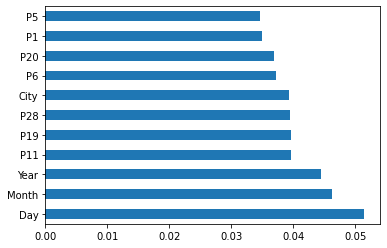

In [71]:
feature_importances = pd.Series(model.feature_importances_,index = X_train.columns)
feature_importances.nlargest(11).plot(kind = 'barh')
plt.show()

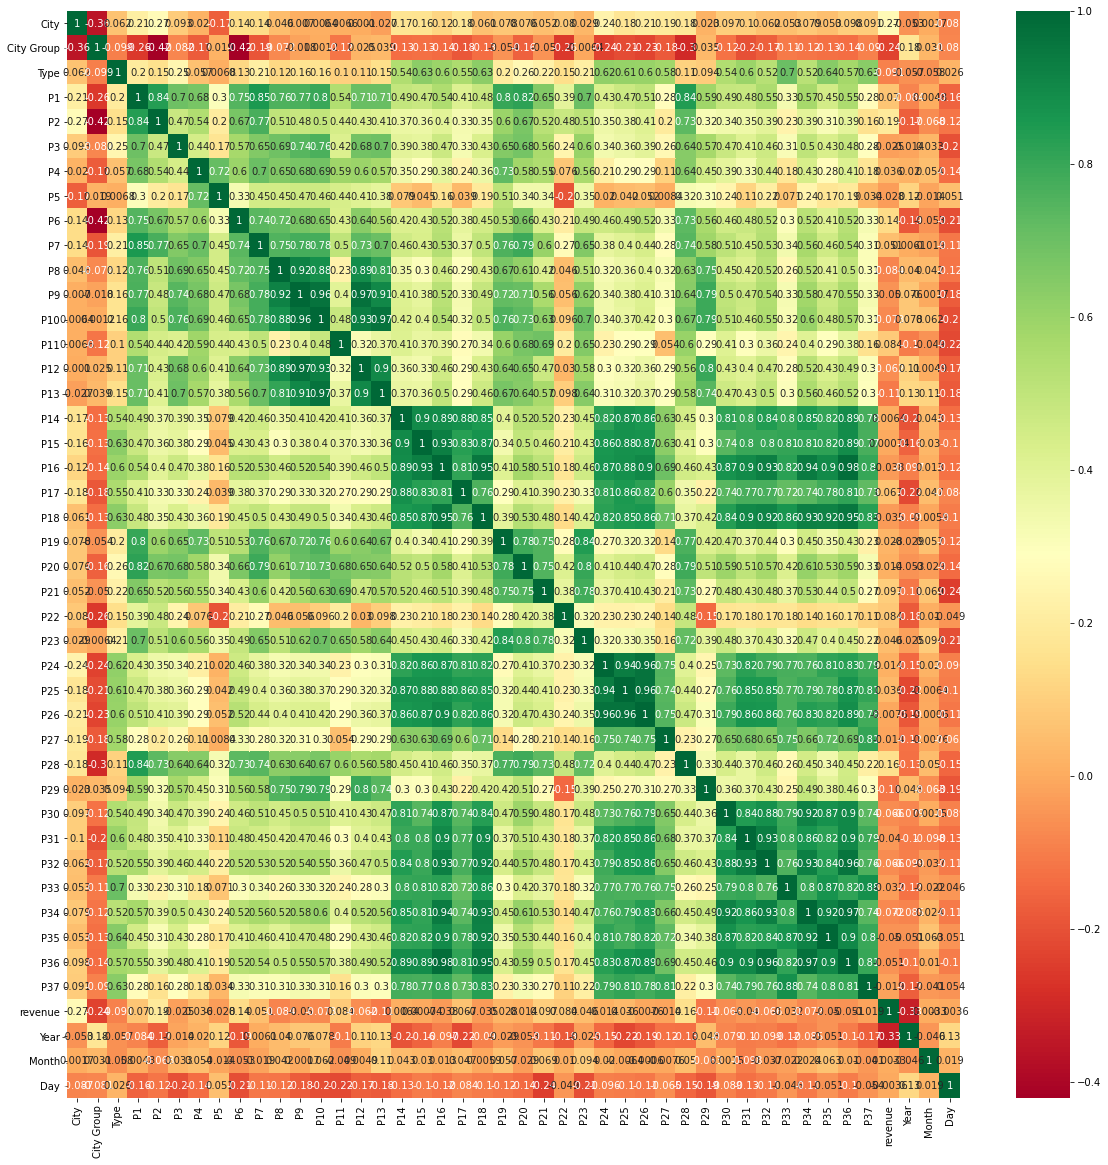

In [72]:
corrmat = data_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [73]:
from sklearn import linear_model

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train,y_train)
pred = model.predict(X_test)
model.score(X_train,y_train)

0.858855689804165